In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input

# دریافت داده‌های cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# پیش‌پردازش داده‌ها
train_images = tf.image.resize(train_images, (32, 32)) / 255.0
test_images = tf.image.resize(test_images, (32, 32)) / 255.0

# تبدیل تصاویر به فرمت مناسب برای VGG16
train_images = preprocess_input(train_images)
test_images = preprocess_input(test_images)

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# ایجاد مدل VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# قفل لایه‌های مدل تا لایه آخر
for layer in base_model.layers[:-1]:
    layer.trainable = False

# افزودن لایه‌های جدید برای طبقه‌بندی تصاویر CIFAR-10
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# کامپایل مدل
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# آموزش مدل
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# ارزیابی مدل
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
782/782 [==============================] - 465s 594ms/step - loss: 2.2722 - accuracy: 0.1862 - val_loss: 2.0510 - val_accuracy: 0.2733
Epoch 2/10
782/782 [==============================] - 459s 587ms/step - loss: 2.0703 - accuracy: 0.2413 - val_loss: 1.9954 - val_accuracy: 0.2695
Epoch 3/10
782/782 [==============================] - 451s 577ms/step - loss: 2.0023 - accuracy: 0.2675 - val_loss: 2.0149 - val_accuracy: 0.2554
Epoch 4/10
782/782 [==============================] - 450s 575ms/step - loss: 1.9644 - accuracy: 0.2851 - val_loss: 1.9987 - val_accuracy: 0.2725
Epoch 5/10
782/782 [==============================] - 451s 577ms/step - loss: 1.9433 - accuracy: 0.2861 - val_loss: 1.9009 - val_accuracy: 0.2996
Epoch 6/10
782/782 [==============================] - 459s 588ms/step - loss: 1.9149 - accuracy: 0.3005 - val_loss: 1.9107 - val_accuracy: 0.3056
Epoch 7/10
782/782 [==============================] - 451s 577ms/step - loss: 1.9049 - accuracy: 0.3039 - val_loss: 1.9132 -

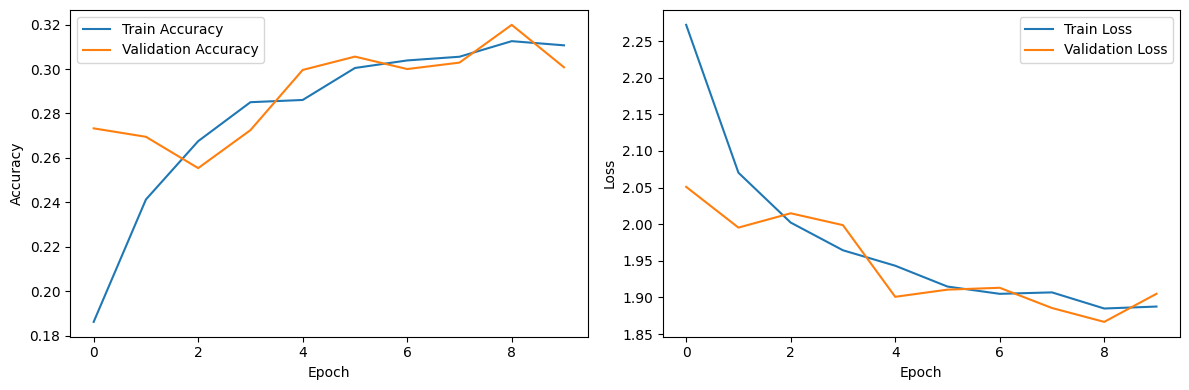

In [13]:
import matplotlib.pyplot as plt

# نمودار دقت و خطا
plt.figure(figsize=(12, 4))

# نمودار دقت
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# نمودار خطا
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# نمایش نمودارها
plt.tight_layout()
plt.show()


In [17]:
from sklearn.metrics import classification_report

# ارزیابی مدل
y_pred = model.predict(test_images)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true_classes = tf.argmax(test_labels, axis=1)

# گزارش ارزیابی
print(classification_report(y_true_classes, y_pred_classes))


313/313 [==============================] - 87s 278ms/step
              precision    recall  f1-score   support

           0       0.31      0.43      0.36      1000
           1       0.46      0.14      0.22      1000
           2       0.23      0.08      0.12      1000
           3       0.22      0.02      0.04      1000
           4       0.32      0.25      0.28      1000
           5       0.32      0.52      0.39      1000
           6       0.40      0.05      0.09      1000
           7       0.22      0.50      0.30      1000
           8       0.37      0.46      0.41      1000
           9       0.31      0.56      0.40      1000

    accuracy                           0.30     10000
   macro avg       0.32      0.30      0.26     10000
weighted avg       0.32      0.30      0.26     10000

